In [ ]:
 import pandas as pd
 import numpy as np
 from scipy.sparse import csr_matrix
 from sklearn.neighbors import NearestNeighbors
 import matplotlib.pyplot as plt
 import seaborn as sns


In [ ]:
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')



In [ ]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

In [ ]:
def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [ ]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')      
final_dataset.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_dataset.fillna(0,inplace=True) 
final_dataset.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count') 
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')


In [ ]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [ ]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


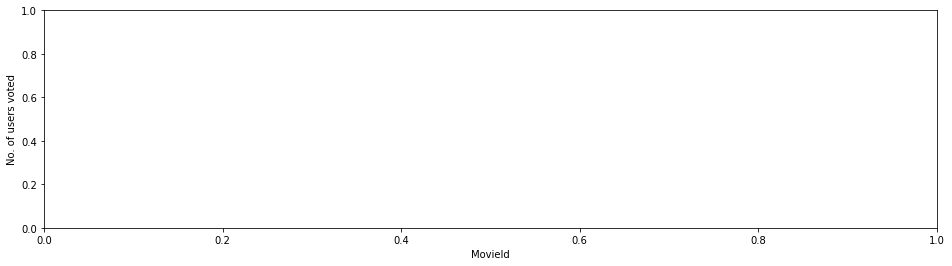

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4)) 
# ratings['rating'].plot(kind='hist') plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen') plt.axhline(y=10,color='r') 
plt.xlabel('MovieId') 
plt.ylabel('No. of users voted') 
plt.show()


In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

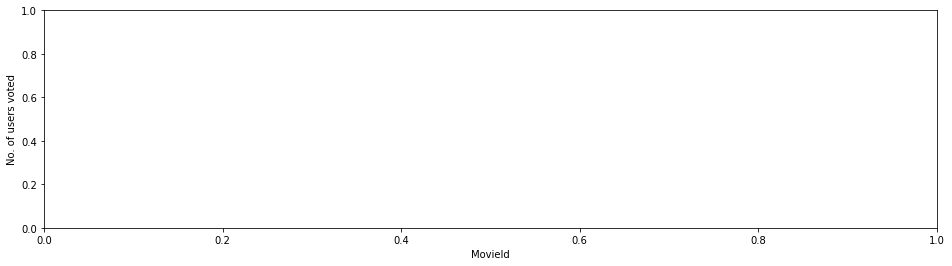

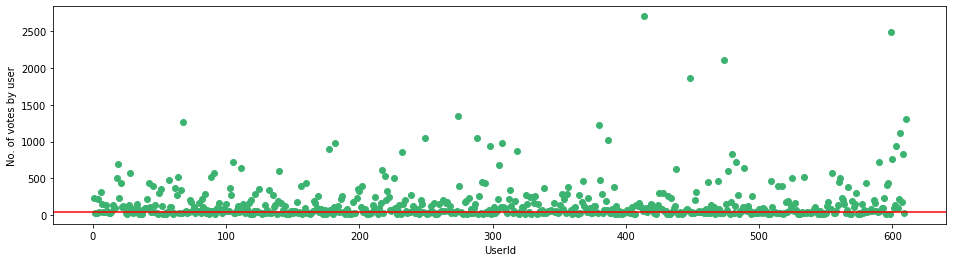

In [ ]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count') 
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

f,ax = plt.subplots(1,1,figsize=(16,4)) 
# ratings['rating'].plot(kind='hist') plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen') plt.axhline(y=10,color='r') 
plt.xlabel('MovieId') 
plt.ylabel('No. of users voted') 
plt.show()

final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]



f,ax=plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen') 
plt.axhline(y=50,color='r') 
plt.xlabel('UserId')
plt.ylabel('No. of votes by user') 
plt.show()


In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted>50].index]
final_dataset
 
sample =np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]]) 
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) ) 
print(sparsity*100)

csr_sample = csr_matrix(sample)
print(csr_sample)

csr_data = csr_matrix(final_dataset.values) 
final_dataset.reset_index(inplace=True)

knn=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20,n_jobs=-1)
knn.fit(csr_data)
NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine', metric_params=None, n_jobs=-1, n_neighbors=20, p=2, radius=1.0)


73.33333333333334
  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def get_movie_recommendation(movie_name):   
  n_movies_to_reccomend = 10  
  movie_list = movies[movies['title'].str.contains(movie_name)] 
  if len(movie_list):   
    movie_idx=movie_list.iloc[0]['movieId']
    movie_idx=final_dataset[final_dataset['movieId']==movie_idx].index[0]   
    distances,indices=knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1) 
    rec_movie_indices=sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]  
    recommend_frame = []  
    for val in rec_movie_indices:   
      movie_idx = final_dataset.iloc[val[0]]['movieId']   
      idx=movies[movies['movieId']==movie_idx].index  
      recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]}) 
      df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1)) 
    return df 
  else: 
    return "No movies found. Please check your input"   
                                                                                      